### Consultando nuestra librería Smart IoT disponible en GitHub



In [1]:
url = 'https://raw.githubusercontent.com/AlbertoPachecoDev/smart-iot-library/main/smartiot.py'
!wget --no-cache --backups=1 {url}

--2022-07-22 04:26:17--  https://raw.githubusercontent.com/AlbertoPachecoDev/smart-iot-library/main/smartiot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2474 (2.4K) [text/plain]
Saving to: ‘smartiot.py’

smartiot.py         100%[===================>]   2.42K  --.-KB/s    in 0s      

2022-07-22 04:26:17 (32.1 MB/s) - ‘smartiot.py’ saved [2474/2474]



In [2]:
import smartiot

smartiot.version()

Smart IoT Library ver. 0.4
torchaudio ver. 0.12.0+cu113


In [3]:
help(smartiot)

Help on module smartiot:

NAME
    smartiot - # Smart IoT Library

FUNCTIONS
    load_audio(url, fname)
        Retrieve audio file from URL and saves with a filename 
        Returns audio-wave, sample-rate, metada, bytes-size
    
    play_audio(wave, sample_rate, torch=True)
        Plays PyTorch/NumPy audio signals
    
    plot_fft(wave, max_freq=None)
        Display fft signal from 0 - max_freq range
    
    plot_wave(wave, torch=True)
        Plot PyTorch or NumPy wave signal
    
    print_info(info, fname=None)
        Shows audio metadata information using load_audio tuple
    
    version()
        Shows Smar IoT library version
    
    wave_size(wave)
        Returns wave memory size

FILE
    /content/smartiot.py




### Leer archivos de audio en Internet

In [4]:
import requests
import torchaudio

def load_audio(url, fname):
  '''
    Retrieve audio file from URL and saves with a filename 
    Returns audio-wave, sample-rate, metada, bytes-size
  '''
  r = requests.get(url)
  with open(fname, 'wb') as f:
    f.write(r.content)
  sz = len(r.content)
  meta = torchaudio.info(fname)
  wave, sr = torchaudio.load(fname)
  return (wave, sr, meta, sz)

fname = 'steam-train.wav'
url = 'https://pytorch.org/tutorials//_static/img/steam-train-whistle-daniel_simon-converted-from-mp3.wav'
r = load_audio(url, fname)
for d in r:
  print(d)

tensor([[ 2.7161e-03,  6.3477e-03,  9.2468e-03,  ...,  3.0518e-05,
          0.0000e+00,  0.0000e+00],
        [-3.7537e-03, -1.5259e-03,  1.3123e-03,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])
44100
AudioMetaData(sample_rate=44100, num_frames=276858, num_channels=2, bits_per_sample=16, encoding=PCM_S)
1107596


In [5]:
fname = 'steam-train.wav'
url = 'https://pytorch.org/tutorials//_static/img/steam-train-whistle-daniel_simon-converted-from-mp3.wav'
r = requests.get(url)
with open(fname, 'wb') as f:
  f.write(r.content)
sz = len(r.content)
wave, sr = torchaudio.load(fname)
print('tensor:', wave)
print('size:', sz)

tensor: tensor([[ 2.7161e-03,  6.3477e-03,  9.2468e-03,  ...,  3.0518e-05,
          0.0000e+00,  0.0000e+00],
        [-3.7537e-03, -1.5259e-03,  1.3123e-03,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])
size: 1107596


In [6]:
wave.shape

torch.Size([2, 276858])

In [7]:
meta = torchaudio.info(fname)
print(meta)

AudioMetaData(sample_rate=44100, num_frames=276858, num_channels=2, bits_per_sample=16, encoding=PCM_S)


In [8]:
meta.bits_per_sample // 8 * meta.num_channels * meta.num_frames

1107432

In [9]:
wave.element_size() * wave.shape[0] * wave.shape[1]

2214864

In [10]:
wave.element_size() * meta.num_channels * meta.num_frames

2214864

In [11]:
wave.dtype

torch.float32

### Usando función de librería para cargar archivo de audio

In [12]:
from smartiot import load_audio

fname = 'steam-train.wav'
url = 'https://pytorch.org/tutorials//_static/img/steam-train-whistle-daniel_simon-converted-from-mp3.wav'
info = load_audio(url, fname)
for d in info:
  print(d)

tensor([[ 2.7161e-03,  6.3477e-03,  9.2468e-03,  ...,  3.0518e-05,
          0.0000e+00,  0.0000e+00],
        [-3.7537e-03, -1.5259e-03,  1.3123e-03,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])
44100
AudioMetaData(sample_rate=44100, num_frames=276858, num_channels=2, bits_per_sample=16, encoding=PCM_S)
1107596


### Mostrando información del archivo de audio

In [28]:
def print_info(info, fname=None):
  ''' Muestra los metadatos de un archivo de audio con la tupla que regresa load_audio'''
  if fname:
    print('-' * 30)
    print('   Filename:', fname)
    print('-' * 30)
  wave, sr, meta, sz = info
  channels, frames = wave.shape
  print(f'     Frames: {frames}')
  print(f'   Channels: {channels}')
  print(f'  File size: {sz} bytes')
  print(f'Tensor size: {wave_size(wave)} bytes')
  print(f'      Dtype: {wave.dtype}')
  print(f'        Max: {wave.max().item():6.3f}')
  print(f'        Min: {wave.min().item():6.3f}')
  print(f'       Mean: {wave.mean().item():6.3f}')
  print(f'    Std Dev: {wave.std().item():6.3f}')
  print(wave)

print_info(info, fname)

------------------------------
   Filename: steam-train.wav
------------------------------
     Frames: 276858
   Channels: 2
  File size: 1107596 bytes
Tensor size: 2214864 bytes
      Dtype: torch.float32
        Max:  0.576
        Min: -0.573
       Mean:  0.000
    Std Dev:  0.135
tensor([[ 2.7161e-03,  6.3477e-03,  9.2468e-03,  ...,  3.0518e-05,
          0.0000e+00,  0.0000e+00],
        [-3.7537e-03, -1.5259e-03,  1.3123e-03,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])


### Visualizar señal de audio

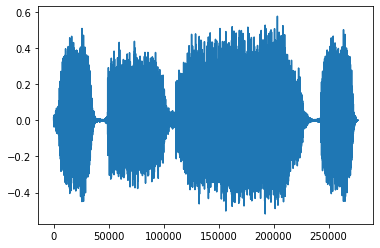

In [14]:
import matplotlib.pyplot as plt

wave, sample_rate, meta, _ = info 

def plot_wave(wave, torch=True):
  ''' Plotting PyTorch or NumPy wave signal '''
  plt.figure()
  plt.plot(wave[0].numpy() if torch else wave)

plot_wave(wave)

### Reproduciendo señal de audio

In [15]:
from IPython.display import Audio, display

def play_audio(wave, sample_rate, torch=True):
  ''' Plays PyTorch/NumPy audio signals '''
  channels = (1 if wave.ndim == 1 else wave.shape[0])
  if torch:
    wave = wave.numpy()
    if channels == 1:
      display(Audio(wave, rate=sample_rate))
    elif channels == 2:
      display(Audio((wave[0], wave[1]), rate=sample_rate))
    else:
      raise ValueError("Waveform with more than 2 channels are not supported.")
  else: # numpy array
    if channels == 1:
      display(Audio(wave, rate=sample_rate))
    else:
      display(Audio((wave[0], wave[1]), rate=sample_rate))

play_audio(wave, sample_rate)

### Transformada de Fourier: Fast Fourier Transform (FFT) 

https://new.pythonforengineers.com/blog/audio-and-digital-signal-processingdsp-in-python/

In [16]:
import numpy as np

channel1 = wave[0].numpy()
fft = np.fft.fft(channel1)
fft[100]

(-0.25064746675317223+3.6953112210267847j)

In [17]:
nyquist_freq = sample_rate // 2
dist_freq = np.abs(fft[:nyquist_freq])
max_val = np.max(dist_freq)
max_val, dist_freq

(3093.889179042748,
 array([25.72027588,  7.43076352,  3.88249822, ..., 10.20138127,
         8.80016965,  1.46001127]))

In [18]:
hi_freq_idx = np.argmax(dist_freq)
hi_freq_idx
print(f'Highest frequency density = {hi_freq_idx}Hz, corresponds to value {dist_freq[hi_freq_idx]:.2f}')

Highest frequency density = 3908Hz, corresponds to value 3093.89


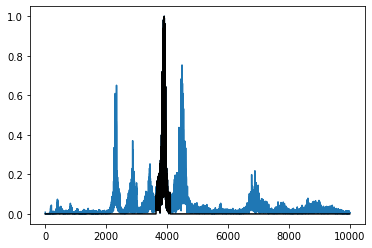

In [19]:
hz = 10000
norm_df = dist_freq / max_val
plot_wave(norm_df[:hz], torch=False)

banda = np.zeros((10000,))
f1, f2 = hi_freq_idx-270, hi_freq_idx+200
for i in range(f1, f2):
  banda[i] = norm_df[i]
plt.plot(banda, color='black')

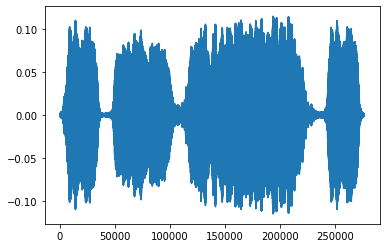

In [20]:
modif_fft = 0.01 * fft
f1, f2 = hi_freq_idx-270, hi_freq_idx+200

for i in range(f1, f2):
  modif_fft[i] = 1.0 * fft[i]

filtered_train = np.fft.ifft(modif_fft).real

play_audio(filtered_train, sample_rate, torch=False)
plot_wave(filtered_train, torch=False)


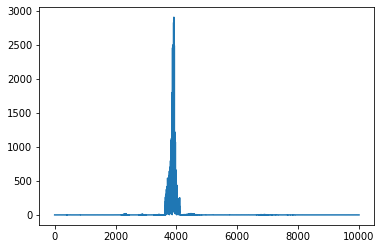

In [21]:
plot_wave(np.abs(modif_fft[:hz].real), torch=False)

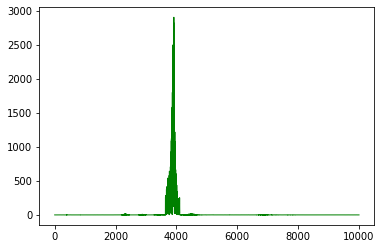

In [22]:
def plot_fft(wave, max_freq=None):
  ''' Display fft signal from 0 - max_freq range'''
  wave2 = wave[:max_freq] if max_freq else wave
  wave3 = np.abs(wave2.real)
  plt.figure()
  plt.plot(wave3, lw=1, color='green')

plot_fft(modif_fft, hz)

In [23]:
from numpy.linalg import norm

norm(wave), norm(filtered_train)

(100.49349, 25.894580013456196)

### torchaudio transformations

In [24]:
wave.shape, sample_rate // 16

(torch.Size([2, 276858]), 2756)

In [25]:
import torchaudio.transforms as T
import torchaudio.functional as F

resample = sample_rate // 16
wave2 = F.resample(wave, sample_rate, resample)
wave3 = wave2[0] # one-channel

play_audio(wave, sample_rate)
play_audio(wave3, resample)

In [26]:
def wave_size(wave):
  ''' Returns wave memory size '''
  if wave.ndim == 1:
    channels, frames = 1, wave.shape[0]
  else:
    channels, frames = wave.shape
  return wave.element_size() * channels * frames

print(wave_size(wave) // wave_size(wave3),'times smaller -->', wave_size(wave3), 'bytes')

32 times smaller --> 69212 bytes


## Sox Effects (Filtering & Resampling)

2 times smaller --> 1107432 bytes


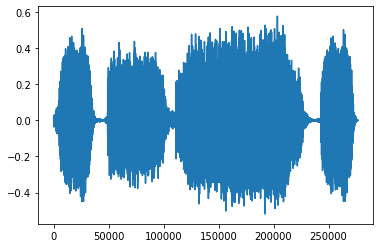

In [35]:
def resample(waves, resample):
  effects = [
    ["remix", "1"]
  ]
  effects.extend([
      ["lowpass", f"{resample // 2}"],
      ["rate", f"{resample}"],
  ])
  return torchaudio.sox_effects.apply_effects_tensor(waves, resample, effects=effects)

sr = sample_rate // 4
wave4, _ = resample(wave, sr)
wave5 = wave4[0]
sz = wave_size(wave5)
print(wave_size(wave) // sz,'times smaller -->', sz, 'bytes')
play_audio(wave5, sample_rate)
plot_wave(wave4)

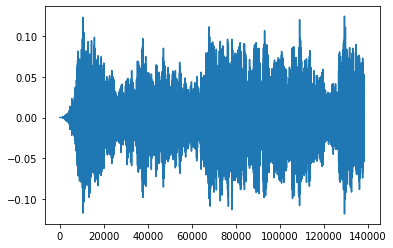

In [36]:
# Define effects
effects = [
  ["lowpass", "-1", "300"], # apply single-pole lowpass filter
  ["speed", "2"],  # reduce the speed
  ["rate", f"{sample_rate}"],
  ["reverb", "-w"],  # Reverbration gives some dramatic feeling
]

# Apply effects
wave6, _ = torchaudio.sox_effects.apply_effects_tensor(wave, sample_rate, effects)
play_audio(wave6, sample_rate)
plot_wave(wave6)

### Audiomentations: Composing transformations (Gain, Polarity & Noise)

In [50]:
!pip install torch-audiomentations

705600 bytes


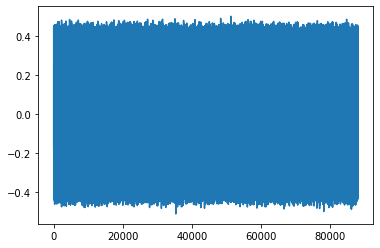

In [52]:
import torch
from torch_audiomentations import Compose, Gain, PolarityInversion, AddColoredNoise

# Initialize augmentation callable
apply_augmentation = Compose(
    transforms = [
        Gain(
            min_gain_in_db = -15.0,
            max_gain_in_db = -1.0,
            p = 0.5,
        ),
        PolarityInversion(p=0.5),
        AddColoredNoise(8, p=1.0) # optional
    ]
)

sr = sample_rate # sample rate

# Make an example tensor with white noise
# This tensor represents 8 audio snippets with 2 channels & 2 sec of 16 kHz audio
audio_samples = torch.rand(size=(8, 2, 2 * sr), dtype=torch.float32) - 0.5

# Apply augmentation. This varies the gain and polarity 
perturbed_audio_samples = apply_augmentation(audio_samples, sample_rate=sr)
index = torch.randint(len(perturbed_audio_samples), size=(1,))[0].item()
noise = perturbed_audio_samples[index]

print(wave_size(noise), 'bytes')
play_audio(noise, sr)
plot_wave(noise)

In [53]:
from torch import linalg as LA

wave_power  = LA.norm(wave)
noise_power = LA.norm(noise)

print(f' wave level = {wave_power.item():.2f}')
print(f'noise level = {noise_power.item():.2f}')

 wave level = 100.49
noise level = 108.22


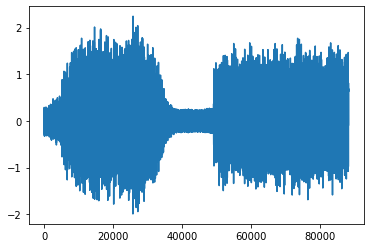

In [54]:
import math

snr = math.exp(2) # signal-to-noise ratio = 2:1 (try other values: 3, 2, 1
scale = snr * noise_power / wave_power

short_wave = wave[:, :noise.shape[1]]

noisy_train = (scale * short_wave + noise) / 2

play_audio(noisy_train, sr)
plot_wave(noisy_train)

### IIR filter: Removing Noise

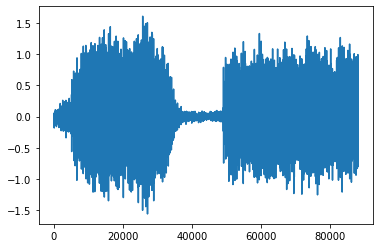

In [58]:
from scipy.signal import lfilter

n = 23  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
wave7 = lfilter(b, a, noisy_train[0].numpy())

play_audio(wave7, sample_rate, torch=False)
plot_wave(wave7, torch=False)

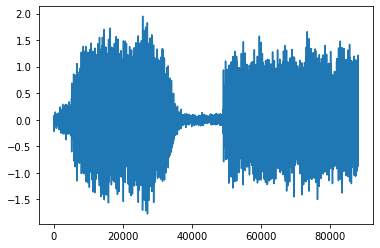

In [62]:
from scipy.signal import savgol_filter

wave8 = savgol_filter(noisy_train[0].numpy(), 33, 2)

play_audio(wave8, sample_rate, torch=False)
plot_wave(wave8, torch=False)